<a href="https://colab.research.google.com/github/aishwaryaaramanathan/FOML_lab_241501011/blob/main/exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
recipes=pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()
recipes.shape

(20, 9)

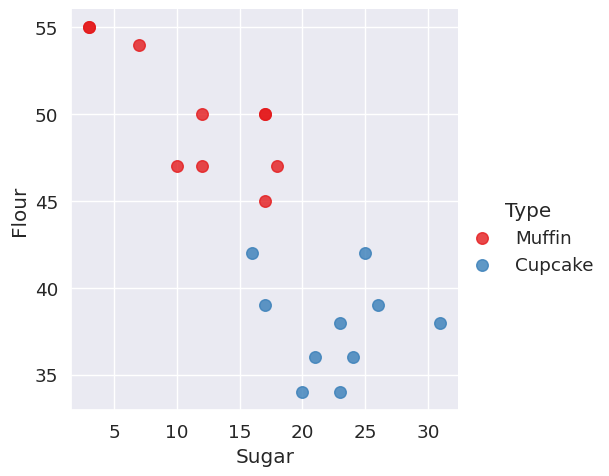

In [2]:
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})


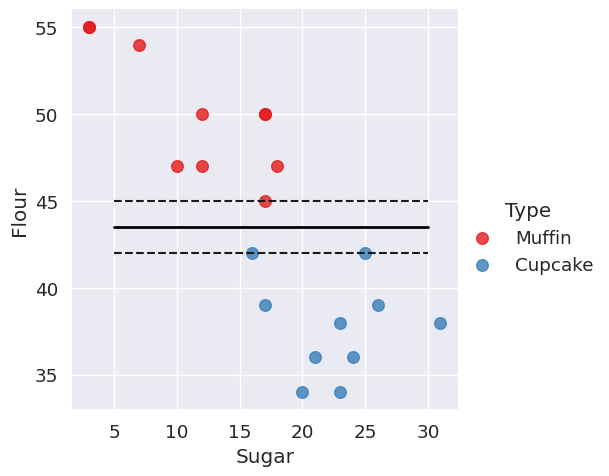

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

# Prepare data
sugar_butter = recipes[['Sugar', 'Flour']].values
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(sugar_butter, type_label)

# Get separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Plot support vectors and margins
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot data points
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# Plot hyperplane and margins
plt.plot(xx, yy, color='black', linewidth=2)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.show()


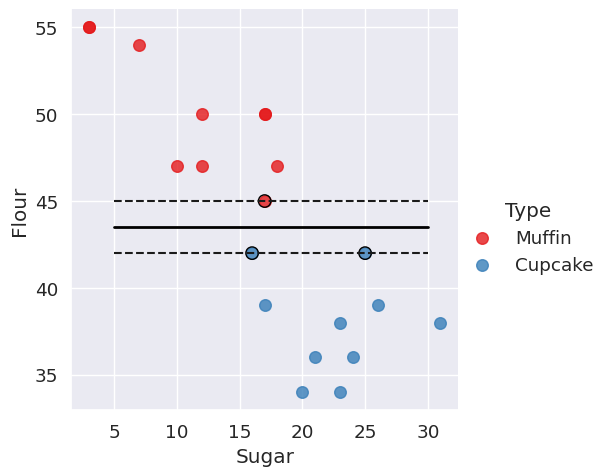

In [4]:
sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

plt.plot(xx, yy, linewidth=2, color='black')       # Decision boundary
plt.plot(xx, yy_down, 'k--')                       # Lower margin
plt.plot(xx, yy_up, 'k--')                         # Upper margin

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='black')

plt.show()


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = train_test_split(sugar_butter,type_label,test_size=0.2)
model1=svm.SVC(kernel='linear')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(pred)

[1 0 1 0]


In [7]:
print(confusion_matrix(y_test,pred))

[[1 0]
 [1 2]]


In [8]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

